# Exploratory Data Analysis (EDA)

**Learning objectives**
- Perform exploratory data analysis on covid dataset
- Draw histogram, pie, scatterplot, box, violin, bar, heatmap using Seaborn

**Why is EDA important?**

*EDA helps us better understand the data*

**How do you go about exploring data?**
- summary statistics (i.e. mean, median, standard deviation)
- visualization methods  

This notebook utilizes Seaborn, a visualizations library built on top of matplotlib

reference: https://seaborn.pydata.org/tutorial.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [48]:
data_URL = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Accessing dataset with API endpoints
# Using usecols to filter only the required columns for analysis

#df = pd.read_csv(data_URL)
#df.shape

df = pd.read_csv(data_URL, usecols=['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_cases_per_million', 'new_cases', 'new_cases_smoothed', 'population', 'population_density', 'median_age', 'gdp_per_capita', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'human_development_index'])
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
228744      ZWE    Africa     Zimbabwe  2022-10-15     257827.0        0.0   
228745      ZWE    Africa     Zimbabwe  2022-10-16     257893.0       66.0   
228746      ZWE    Africa     Zimbabwe  2022-10-17     257893.0        0.0   
228747      ZWE    Africa     Zimbabwe  2022-10-18     257893.0        0.0   
228748      ZWE    Africa     Zimbabwe  2022-10-19     257893.0        0.0   

        new_cases_smoothed  total_cases_per_million  population_density  \
0                      NaN                    0.125              54.422   
1                      NaN                    0.125              54.422   
2                      NaN                    0.125              54.422   
3                      NaN                    0.125              54.422   
4                      NaN                    0.125              54.422   
...                    ...                      ...                 ...   
228744              24.571                16120.712              42.729   
228745              34.000                16124.839              42.729   
228746              20.571                16124.839              42.729   
228747              20.571                16124.839              42.729   
228748              13.571                16124.839              42.729   

        median_age  gdp_per_capita  female_smokers  male_smokers  \
0             18.6        1803.987             NaN           NaN   
1             18.6        1803.987             NaN           NaN   
2             18.6        1803.987             NaN           NaN   
3             18.6        1803.987             NaN           NaN   
4             18.6        1803.987             NaN           NaN   
...            ...             ...             ...           ...   
228744        19.6        1899.775             1.6          30.7   
228745        19.6        1899.775             1.6          30.7   
228746        19.6        1899.775             1.6          30.7   
228747        19.6        1899.775             1.6          30.7   
228748        19.6        1899.775             1.6          30.7   

        handwashing_facilities  human_development_index  population  
0                       37.746                    0.511  40099462.0  
1                       37.746                    0.511  40099462.0  
2                       37.746                    0.511  40099462.0  
3                       37.746                    0.511  40099462.0  
4                       37.746                    0.511  40099462.0  
...                        ...                      ...         ...  
228744                  36.791                    0.571  15993524.0  
228745                  36.791                    0.571  15993524.0  
228746                  36.791                    0.571  15993524.0  
228747                  36.791                    0.571  15993524.0  
228748                  36.791                    0.571  15993524.0  

[228749 rows x 16 columns]

In [42]:
df.shape

(210331, 16)

In [47]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_cases_per_million', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'human_development_index'],
      dtype='object')

In [44]:
# summary statistics
df.describe()

total_cases     new_cases  new_cases_smoothed  \
count  2.103310e+05  2.103310e+05       200074.000000   
mean   1.060249e+06  2.962966e+03         3104.421958   
std    4.831958e+06  1.787817e+04        17106.891012   
min    0.000000e+00  0.000000e+00            0.000000   
25%    2.354500e+03  0.000000e+00            5.286000   
50%    3.267300e+04  3.000000e+01           74.857000   
75%    3.445075e+05  5.990000e+02          802.571000   
max    9.699047e+07  1.355363e+06       806999.571000   

       total_cases_per_million    population  population_density  \
count            201469.000000  2.103310e+05       197454.000000   
mean              59911.193929  3.681933e+07          459.871652   
std              107077.830730  1.426000e+08         2115.046810   
min                   0.001000  4.700000e+01            0.137000   
25%                1001.139000  7.078510e+05           37.312000   
50%                9831.979000  6.527743e+06           88.125000   
75%               72030.406000  2.592109e+07          214.243000   
max              662430.093000  1.425893e+09        20546.766000   

          median_age  gdp_per_capita  female_smokers   male_smokers  \
count  183502.000000   181949.000000   138304.000000  136397.000000   
mean       30.613619    19624.882569       10.706985      32.796474   
std         9.087125    20632.034159       10.658667      13.583133   
min        15.100000      661.240000        0.100000       7.700000   
25%        22.300000     4227.630000        1.900000      21.600000   
50%        29.900000    12951.839000        6.300000      31.400000   
75%        39.100000    27936.896000       19.300000      41.300000   
max        48.200000   116935.600000       44.000000      78.100000   

       handwashing_facilities  human_development_index  
count            89579.000000            178498.000000  
mean                50.826613                 0.724746  
std                 32.044779                 0.150027  
min                  1.188000                 0.394000  
25%                 19.351000                 0.602000  
50%                 49.542000                 0.743000  
75%                 83.241000                 0.845000  
max                100.000000                 0.957000

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210331 entries, 0 to 224489
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   iso_code                 210331 non-null  object 
 1   continent                210331 non-null  object 
 2   location                 210331 non-null  object 
 3   date                     210331 non-null  object 
 4   total_cases              210331 non-null  float64
 5   new_cases                210331 non-null  float64
 6   new_cases_smoothed       200074 non-null  float64
 7   total_cases_per_million  201469 non-null  float64
 8   population               210331 non-null  float64
 9   population_density       197454 non-null  float64
 10  median_age               183502 non-null  float64
 11  gdp_per_capita           181949 non-null  float64
 12  female_smokers           138304 non-null  float64
 13  male_smokers             136397 non-null  float64
 14  hand

### data cleaning

In [14]:
df['new_cases'] = df['new_cases'].fillna(0)
df['total_cases'] = df['total_cases'].fillna(0)
df['new_cases'] = df['new_cases'].clip(lower=0)
df['new_cases_smoothed'] = df['new_cases_smoothed'].clip(lower=0)
df['total_cases'] = df['total_cases'].clip(lower=0)

In [15]:
# Finding aggregated ISO Codes from data (For more information visit URL given below)
df[df["iso_code"].str.contains("OWID_")==True]['iso_code'].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM',
       'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_UMC', 'OWID_WRL'],
      dtype=object)

In [16]:
# Extract filtered data from dataframes
world_df = df[df["iso_code"] == "OWID_WRL"]
africa_df = df[df["iso_code"] == "OWID_AFR"]
asia_df = df[df["iso_code"] == "OWID_ASI"]
europe_df = df[df["iso_code"] == "OWID_EUR"]
na_df = df[df["iso_code"] == "OWID_NAM"]
sa_df = df[df["iso_code"] == "OWID_SAM"]
oce_df = df[df["iso_code"] == "OWID_OCE"]
# Keep only countrywise data and remove all other aggregated data
df = df[df["iso_code"].str.contains("OWID_")==False]

### Histogram of median age across all countries

A histogram is used to display the distribution of a variable.  The range of values for the variable is divided into the number of bins, and the the number of values that fall into each bin is counted, which determines the height of each bin.  

<AxesSubplot:xlabel='median_age', ylabel='Count'>

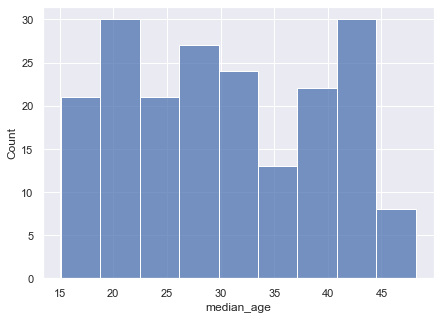

In [51]:
df_last_df = df.drop_duplicates(subset=['iso_code'], keep='last')
sns.histplot(df_last_df['median_age'], bins='auto')

### Pie Chart of cases across continents

Seaborn can't maks pie charts, but you can use the following syntax in Matplotlib to create a pie chart and add a Seaborn color palette

**Let's look at how total cases vary by continent**

<ipython-input-18-44731cd24be0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure2.show()


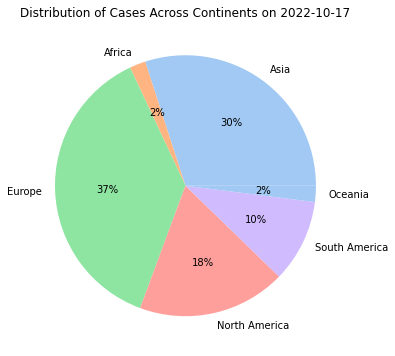

In [18]:
data = [asia_df.iloc[-1]['total_cases'],
        africa_df.iloc[-1]['total_cases'],
        europe_df.iloc[-1]['total_cases'],
        na_df.iloc[-1]['total_cases'],
        sa_df.iloc[-1]['total_cases'],
        oce_df.iloc[-1]['total_cases'],
        ]

labels = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania']

colors = sns.color_palette('pastel')[0:5]
figure2 = plt.figure(figsize=(12, 6))

plt.title('Distribution of Cases Across Continents on ' + na_df.iloc[-1]['date'])
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

figure2.show()

In [53]:
# df_last_df

iso_code continent        location        date  total_cases  \
968          AFG      Asia     Afghanistan  2022-10-19     201557.0   
1948    OWID_AFR       NaN          Africa  2022-10-19   12371352.0   
2916         ALB    Europe         Albania  2022-10-19     332701.0   
3884         DZA    Africa         Algeria  2022-10-19     270768.0   
4846         AND    Europe         Andorra  2022-10-19      46449.0   
...          ...       ...             ...         ...          ...   
224933       ESH    Africa  Western Sahara  2022-04-20          NaN   
225935  OWID_WRL       NaN           World  2022-10-19  626215599.0   
226858       YEM      Asia           Yemen  2022-10-19      11939.0   
227804       ZMB    Africa          Zambia  2022-10-19     333644.0   
228748       ZWE    Africa        Zimbabwe  2022-10-19     257893.0   

        new_cases  new_cases_smoothed  total_cases_per_million  \
968          54.0             118.286                 5026.427   
1948        618.0             840.429                 8884.949   
2916         28.0              20.857               116544.588   
3884          2.0               6.571                 6129.028   
4846         83.0              11.857               587709.087   
...           ...                 ...                      ...   
224933        NaN                 NaN                      NaN   
225935   512604.0          449155.429                79174.640   
226858        0.0               0.000                  361.989   
227804        0.0               2.857                17133.562   
228748        0.0              13.571                16124.839   

        population_density  median_age  gdp_per_capita  female_smokers  \
968                 54.422        18.6        1803.987             NaN   
1948                   NaN         NaN             NaN             NaN   
2916               104.871        38.0       11803.431           7.100   
3884                17.348        29.1       13913.839           0.700   
4846               163.755         NaN             NaN          29.000   
...                    ...         ...             ...             ...   
224933                 NaN        28.4             NaN             NaN   
225935              58.045        30.9       15469.207           6.434   
226858              53.508        20.3        1479.147           7.600   
227804              22.995        17.7        3689.251           3.100   
228748              42.729        19.6        1899.775           1.600   

        male_smokers  handwashing_facilities  human_development_index  \
968              NaN                  37.746                    0.511   
1948             NaN                     NaN                      NaN   
2916          51.200                     NaN                    0.795   
3884          30.400                  83.741                    0.748   
4846          37.800                     NaN                    0.868   
...              ...                     ...                      ...   
224933           NaN                     NaN                      NaN   
225935        34.635                  60.130                    0.737   
226858        29.200                  49.542                    0.470   
227804        24.700                  13.938                    0.584   
228748        30.700                  36.791                    0.571   

          population  
968     4.009946e+07  
1948    1.392394e+09  
2916    2.854710e+06  
3884    4.417797e+07  
4846    7.903400e+04  
...              ...  
224933  5.655810e+05  
225935  7.909295e+09  
226858  3.298164e+07  
227804  1.947312e+07  
228748  1.599352e+07  

[248 rows x 16 columns]

### Scatterplot - Is median_age correlated to gdp_per_capita?

GDP per capita is useful for comparing *country prosperity* of different population sizes

<AxesSubplot:xlabel='median_age', ylabel='gdp_per_capita'>

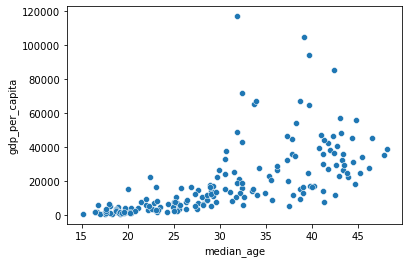

In [20]:
sns.scatterplot(x="median_age", y="gdp_per_capita", data=df_last_df)

it looks like weak positive correlation

### Box plots

`boxplots` compare distributions of numeric variables

### Using a Boxplot let's look at share of men/women who smoke in each country

female_smokers -	Share of women who smoke, most recent year available

male_smokers -	Share of men who smoke, most recent year available

Text(0, 0.5, 'Percentage of Smokers')

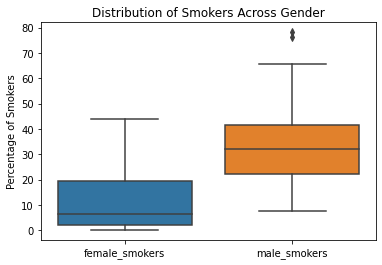

In [21]:
boxplot = sns.boxplot(data=df_last_df[['female_smokers','male_smokers']])
boxplot.axes.set_title("Distribution of Smokers Across Gender", fontsize=12)
boxplot.set_ylabel("Percentage of Smokers", fontsize=10)

The colored portion in the figure above is the ‘box’ part.  The lower and upper boundaries of the box represent the 25th and 75th percentiles, respectively.  This means that the box represents the middle 50% of the data.  
The median is the 50th percentile, meaning that 50% of the data is greater than this value, and the middle 50% of the data values are contained in this region.  The top and bottom lines are the ‘whiskers’, and represent the 10th and 90th percentiles, respectively.  So 80% of the data are in the region indicated by the upper extreme and lower extreme.

# Violin plot

Violin plots are closely related to box plots, but they also show the distribution of the data. Whereas a box plot can also show you if the distribution of the data values is symmetrical, positively skewed, or negatively skewed based on the position of the line in the box, the violin plot shows you the actual distribution.

reference: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

Text(0, 0.5, 'Percentage of Smokers')

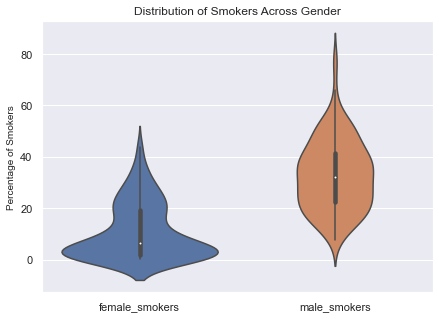

In [41]:
boxplot = sns.violinplot(data=df_last_df[['female_smokers','male_smokers']])
boxplot.axes.set_title("Distribution of Smokers Across Gender", fontsize=12)
boxplot.set_ylabel("Percentage of Smokers", fontsize=10)

female smokers have a more positive skew in distribution whereas males have more symmetric distribution

### Bar Graph - Plot top 10 countries with most number of Covid-19 cases per million till date

`Bar plots` show the distribution of categorical variables. They can be grouped or stacked.

In [22]:
df_top_10_cases = df_last_df.nlargest(10, 'total_cases')

In [23]:
fig = sns.barplot(x='location', y='total_cases_per_million', data=df_top_10_cases)
sns.set(rc = {'figure.figsize':(7,5)})
plt.xticks(rotation=45)
plt.tight_layout()


# Heatmap

Heatmaps graphical display numerical data, where color is used to denote values. They're useful for visualizing correlation tables and visualizing missing values in data.

In [30]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(),annot=False, fmt="f", cmap="YlGnBu", linewidths=0.5)
plt.show()

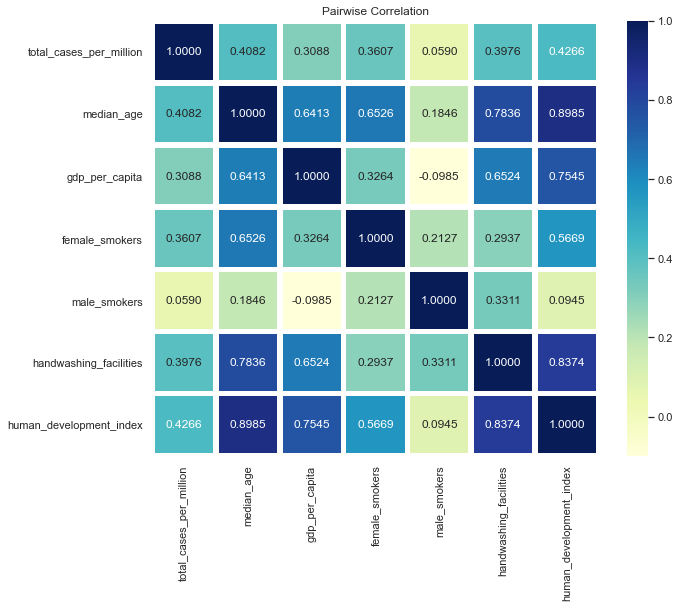

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['total_cases_per_million', 'median_age', 'gdp_per_capita', 'female_smokers','male_smokers','handwashing_facilities','human_development_index']].corr(),
            annot=True, fmt=".4f", cmap="YlGnBu", linewidths=4.5)
plt.title('Pairwise Correlation')
plt.show()